In [2]:
from sklearn.datasets import load_breast_cancer 
import numpy as np

In [3]:
cancer = load_breast_cancer()
print dir(cancer)
cancer.feature_names  

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23')

In [4]:
import pandas as pd
data = pd.read_csv("test2.csv")
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## Using KNN

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier(n_neighbors=6)
xtrain,xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=5)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)


0.9473684210526315

In [7]:
testaccuracy=[]
krange= range(1,11)
xtrain,xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,test_size=0.1,random_state=5)
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    testaccuracy.append( knn.score(xtest,ytest) )
    


In [8]:
import matplotlib.pyplot as plt

plt.plot(krange,testaccuracy)
plt.axis([0,11,0.88,1.00])
plt.show()

<Figure size 640x480 with 1 Axes>

# LOG REG


In [9]:
from sklearn.linear_model import LogisticRegression 

In [10]:
logreg = LogisticRegression()
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=5)
logreg.fit(xtrain2,ytrain2)
print ('Scores {:.3f}'.format(logreg.score(xtest2,ytest2)))

Scores 0.974


/home/aman/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
print logreg.predict_proba(xtest),ytest
print cancer.target_names

[[9.99999546e-01 4.54099420e-07]
 [1.03891285e-02 9.89610872e-01]
 [4.18474993e-03 9.95815250e-01]
 [1.56691930e-02 9.84330807e-01]
 [7.16545594e-02 9.28345441e-01]
 [1.00000000e+00 4.61102940e-21]
 [4.82556628e-02 9.51744337e-01]
 [1.30526526e-03 9.98694735e-01]
 [1.54622350e-01 8.45377650e-01]
 [4.40936914e-03 9.95590631e-01]
 [9.50034823e-02 9.04996518e-01]
 [1.82832082e-02 9.81716792e-01]
 [1.00000000e+00 1.25579696e-10]
 [8.39238159e-03 9.91607618e-01]
 [2.98572147e-03 9.97014279e-01]
 [2.76179263e-03 9.97238207e-01]
 [4.21706539e-02 9.57829346e-01]
 [1.82485652e-03 9.98175143e-01]
 [6.71037473e-03 9.93289625e-01]
 [2.72109541e-02 9.72789046e-01]
 [6.46351385e-01 3.53648615e-01]
 [2.68406296e-03 9.97315937e-01]
 [7.98085033e-03 9.92019150e-01]
 [3.77343195e-03 9.96226568e-01]
 [7.53385926e-03 9.92466141e-01]
 [5.44472019e-02 9.45552798e-01]
 [5.38898642e-01 4.61101358e-01]
 [1.00000000e+00 3.32940977e-10]
 [3.42661539e-02 9.65733846e-01]
 [9.99997216e-01 2.78409149e-06]
 [1.000000

# Tree


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=5)
model.fit(xtrain3,ytrain3)
print model.score(xtrain3,ytrain3)
print model.score(xtest3,ytest3)

1.0
0.956140350877193


In [13]:
model2 = DecisionTreeClassifier(max_depth=3)  # pruning
model2.fit(xtrain3,ytrain3)
print model2.score(xtrain3,ytrain3)
print model2.score(xtest3,ytest3)

0.9714285714285714
0.9649122807017544


In [14]:
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(model2, out_file='file.dot',class_names=['malignant','bening'],feature_names=cancer.feature_names,impurity=False,filled=True)

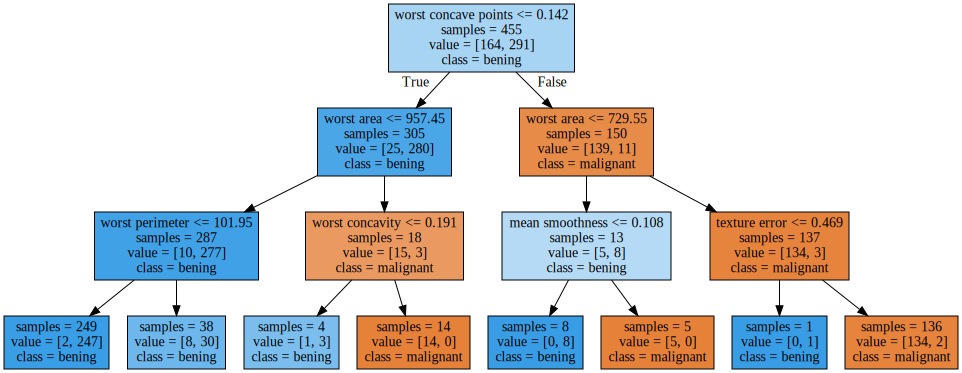

In [15]:
Source.from_file('file.dot')

In [16]:
print model2.feature_importances_,cancer.feature_names

[0.         0.         0.         0.         0.03277939 0.
 0.         0.         0.         0.         0.         0.01026678
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01440159 0.15960092
 0.         0.         0.01864328 0.76430803 0.         0.        ] ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


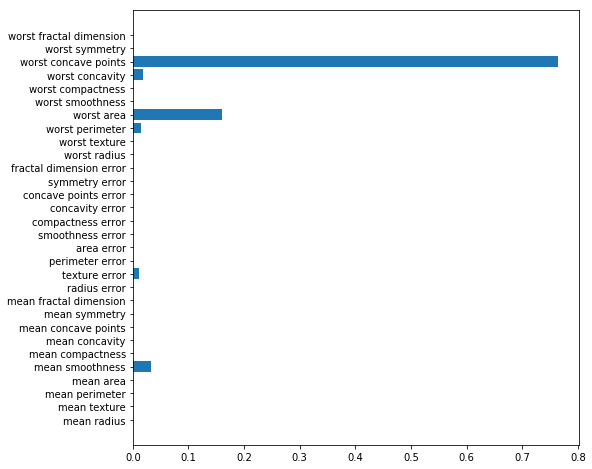

In [17]:
plt.figure(figsize=(8,8))
features = cancer.data.shape[0]
plt.barh(np.arange(1,31),model2.feature_importances_)
plt.yticks(np.arange(1,31),cancer.feature_names)
plt.show()

# Random Forrest

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=10000)
forest.fit(xtrain3,ytrain3)
print forest.score(xtrain3,ytrain3)
print forest.score(xtest3,ytest3)

1.0
0.9736842105263158


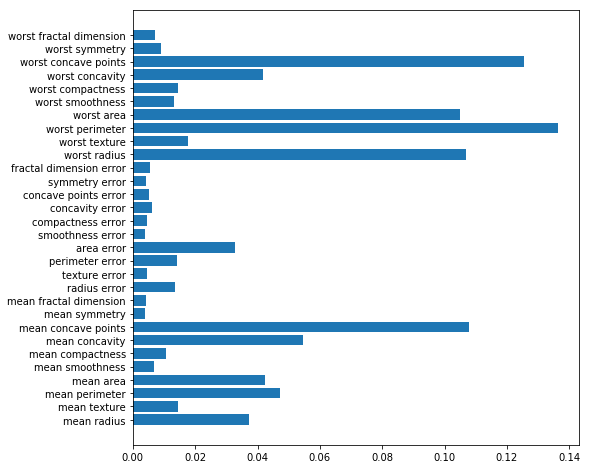

In [19]:
plt.figure(figsize=(8,8))
features = cancer.data.shape[0]
plt.barh(np.arange(1,31),forest.feature_importances_)
plt.yticks(np.arange(1,31),cancer.feature_names)
plt.show()

# NN Feedforward

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000,random_state= 2)
mlp.fit(xtrain3,ytrain3)
print mlp.score(xtrain3,ytrain3)
print mlp.score(xtest3,ytest3)

0.9296703296703297
0.9385964912280702


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain4 = scaler.fit_transform(xtrain3)
ytrain4 = scaler.fit_transform(np.array(ytrain3).reshape(-1,1))
xtest4 = scaler.fit_transform(xtest3)
ytest4 = scaler.fit_transform(np.array(ytest3).reshape(-1,1))
mlp.fit(xtrain4,ytrain4)
print mlp.score(xtrain4,ytrain4)
print mlp.score(xtest4,ytest4)

/home/aman/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/aman/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9912087912087912
0.9473684210526315


In [22]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
xtrain5 = scaler2.fit_transform(xtrain3)
xtest5 = scaler2.fit_transform(xtest3)
mlp.fit(xtrain5,ytrain3)
print mlp.score(xtrain5,ytrain3)
print mlp.score(xtest5,ytest3)

0.9978021978021978
0.9736842105263158


# SVM

In [1]:
from sklearn.svm import SVC

In [43]:
supportmodel = SVC(C=100)

In [44]:
supportmodel.fit(xtrain5,ytrain3)
print supportmodel.score(xtrain5,ytrain3)                         # scaled using Standard scaler
print supportmodel.score(xtest5,ytest3)


1.0
0.9736842105263158


In [45]:
print supportmodel.score(xtrain3,ytrain3)                         # Unscaled data
print supportmodel.score(xtest3,ytest3)

0.6395604395604395
0.5789473684210527


In [42]:
print supportmodel.score(xtrain4,ytrain3)                         # scaled using minmaxscaler
print supportmodel.score(xtest4,ytest3) 

0.3626373626373626
0.42105263157894735
